# Visualize the manually constructed dataset of mining areas and ground truth masks

In [1]:
import geopandas as gpd
import leafmap
from shapely.ops import unary_union
from shapely.geometry import Point, mapping, box, shape
import shapely
import json
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

os.getcwd()
root = os.path.dirname(os.getcwd())
# root = root + "/mine-segmentation"
root

'/home/simonjasansky/programming/mine-segmentation'

In [2]:
raw_dataset = root + "/data/raw/mining_tiles_with_masks.gpkg"

post_dataset = root + "/data/processed/mining_tiles_with_masks_and_bounding_boxes.gpkg"

In [3]:
# Load the data
data = gpd.read_file(raw_dataset, layer="tiles")
print(data.shape)
data.head()

(10, 9)


,tile_id,s2_tile_id,source_dataset,preferred_dataset,minetype1,minetype2,comment,timestamp,geometry
0,2805,S2A_MSIL2A_20191017T004711_R102_T54LWM_2020100...,maus,maus,Surface,Industrial,,2024-07-04 10:04:22.755,"POLYGON ((141.8445 -12.50898, 141.84391 -12.32..."
1,1612,S2B_MSIL2A_20191007T061729_R034_T42UXD_2020100...,tang,tang,Surface,Industrial,,2024-07-04 10:05:26.560,"POLYGON ((72.06065 52.32091, 72.07342 52.50476..."
2,2352,S2B_MSIL2A_20190707T021609_R003_T50LMR_2020100...,both,tang,Surface,Industrial,,2024-07-04 10:06:29.655,"POLYGON ((117.00981 -9.0093, 117.00981 -8.8240..."
3,1167,S2A_MSIL2A_20190424T082611_R021_T33JYF_2020110...,both,tang,Surface,Industrial,,2024-07-04 10:07:19.452,"POLYGON ((18.02702 -31.33978, 18.02113 -31.155..."
4,1107,S2A_MSIL2A_20180827T101021_R022_T32SMD_2020102...,both,tang,Surface,Industrial,,2024-07-04 10:09:21.708,"POLYGON ((8.36212 34.32496, 8.36072 34.50964, ..."


In [4]:
# Create a Leaflet map
m = leafmap.Map()

# Add the GeoDataFrame to the map
m.add_gdf(data, layer_name="dataset")

# Display the map
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## Visualize the global distribution of the tiles

In [5]:
# Using Markers on leafmap
def plot_tiles_on_basemap(gdf):
    import folium

    m = folium.Map()

    # Iterate over the tiles and add markers to the map
    for _, row in gdf.iterrows():
        lat = row.geometry.centroid.y
        lon = row.geometry.centroid.x
        folium.Marker([lat, lon]).add_to(m)

    # Display the map
    return m

plot_tiles_on_basemap(data)

# Load processed dataset

In [6]:
# list layernames 
gpd.list_layers(post_dataset)

,name,geometry_type
0,tiles,Polygon
1,maus_polygons,MultiPolygon
2,tang_polygons,MultiPolygon
3,maus_bboxes,MultiPolygon
4,tang_bboxes,MultiPolygon
5,preferred_polygons,MultiPolygon
6,preferred_bboxes,MultiPolygon


In [7]:
# load the processed dataset
tiles = gpd.read_file(post_dataset, layer="tiles")
maus_poly = gpd.read_file(post_dataset, layer="maus_polygons")
tang_poly = gpd.read_file(post_dataset, layer="tang_polygons")
preferred_poly = gpd.read_file(post_dataset, layer="preferred_polygons")
maus_bbox = gpd.read_file(post_dataset, layer="maus_bboxes")
tang_bbox = gpd.read_file(post_dataset, layer="tang_bboxes")
preferred_bbox = gpd.read_file(post_dataset, layer="preferred_bboxes")
tiles.head()

,tile_id,s2_tile_id,source_dataset,preferred_dataset,minetype1,minetype2,comment,timestamp,geometry
0,2805,S2A_MSIL2A_20191017T004711_R102_T54LWM_2020100...,maus,maus,Surface,Industrial,,2024-07-04 10:04:22.755,"POLYGON ((141.8445 -12.50898, 141.84391 -12.32..."
1,1612,S2B_MSIL2A_20191007T061729_R034_T42UXD_2020100...,tang,tang,Surface,Industrial,,2024-07-04 10:05:26.560,"POLYGON ((72.06065 52.32091, 72.07342 52.50476..."
2,2352,S2B_MSIL2A_20190707T021609_R003_T50LMR_2020100...,both,tang,Surface,Industrial,,2024-07-04 10:06:29.655,"POLYGON ((117.00981 -9.0093, 117.00981 -8.8240..."
3,1167,S2A_MSIL2A_20190424T082611_R021_T33JYF_2020110...,both,tang,Surface,Industrial,,2024-07-04 10:07:19.452,"POLYGON ((18.02702 -31.33978, 18.02113 -31.155..."
4,1107,S2A_MSIL2A_20180827T101021_R022_T32SMD_2020102...,both,tang,Surface,Industrial,,2024-07-04 10:09:21.708,"POLYGON ((8.36212 34.32496, 8.36072 34.50964, ..."


Construct one coherent dataset with the preferred mask

## Visualize the processed dataset

In [8]:
ROW = 6

m = leafmap.Map(center = (tiles.iloc[ROW:ROW+1].geometry.centroid.y.values[0], tiles.iloc[ROW:ROW+1].geometry.centroid.x.values[0]), zoom = 12)
# add satellite
m.add_basemap("SATELLITE")

style_tile = {
    "color": "orange",
    "fillColor": "orange",
    "fillOpacity": 0.0,
}

style_bbox = {
    "color": "green",
    "fillColor": "green",
    "fillOpacity": 0.0,
}

m.add_gdf(tiles.iloc[ROW:ROW+1], layer_name="tiles", style=style_tile)
m.add_gdf(preferred_poly.iloc[ROW:ROW+1], layer_name="masks")
m.add_gdf(preferred_bbox.iloc[ROW:ROW+1], layer_name="bboxes", style=style_bbox)
m

Map(center=[-32.24998637235755, 149.91666578859756], controls=(ZoomControl(options=['position', 'zoom_in_text'…

# Check the image masks and chips

In [9]:
file_index=10
chips_dir = "/data/processed/chips/train/chips"
labels_dir = "/data/processed/chips/train/labels"
files = os.listdir(root + chips_dir)
filename = root + chips_dir + "/" + files[file_index]

img = np.load(filename)
print(img.shape)
img

(3, 512, 512)


array([[[1.060e+03, 1.080e+03, 1.026e+03, ..., 1.136e+03, 1.282e+03,
         1.268e+03],
        [1.024e+03, 1.054e+03, 1.009e+03, ..., 1.160e+03, 1.596e+03,
         1.532e+03],
        [1.008e+03, 9.870e+02, 1.015e+03, ..., 1.146e+03, 1.638e+03,
         1.456e+03],
        ...,
        [1.030e+03, 9.290e+02, 9.110e+02, ..., 1.000e+00, 6.000e+00,
         3.000e+00],
        [1.019e+03, 9.440e+02, 9.130e+02, ..., 1.000e+00, 1.000e+00,
         1.000e+00],
        [9.760e+02, 9.630e+02, 9.170e+02, ..., 1.000e+00, 1.000e+00,
         1.000e+00]],

       [[7.850e+02, 7.420e+02, 7.190e+02, ..., 6.980e+02, 8.400e+02,
         7.280e+02],
        [7.230e+02, 7.380e+02, 7.000e+02, ..., 7.750e+02, 1.096e+03,
         9.860e+02],
        [7.140e+02, 7.280e+02, 7.120e+02, ..., 7.510e+02, 1.124e+03,
         9.800e+02],
        ...,
        [7.240e+02, 6.810e+02, 6.430e+02, ..., 3.200e+01, 3.900e+01,
         8.800e+01],
        [7.490e+02, 6.560e+02, 6.130e+02, ..., 4.900e+01, 5.600e+01,
   

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

def plot_images_and_masks(root, seed=0):
    """
    Plot randomly selected images (numpy arrays) and their corresponding masks (numpy arrays).

    Parameters:
    - root (str): The root directory path
    - seed (int): The seed value for random number generation.

    Returns:
    None
    """

    chips_dir = root + "/data/processed/chips/train/chips"
    masks_dir = root + "/data/processed/chips/train/labels"

    files = os.listdir(chips_dir)
    fig, axs = plt.subplots(5, 2, figsize=(10, 25))

    # generate 5 random indices in the range of the number of files
    np.random.seed(seed)
    indices = list(np.random.choice(len(files), 5, replace=False))
    print(indices)

    for i, file_index in enumerate(indices):
        filename = os.path.join(chips_dir, files[file_index])
        img = np.load(filename)
        im2display = img.transpose((1, 2, 0))
        im2display = (im2display - im2display.min()) / (im2display.max() - im2display.min())
        im2display = np.clip(im2display, 0, 1)
        
        mask_filename = masks_dir + "/" + files[file_index].replace("_img", "_mask")
        mask = np.load(mask_filename).squeeze()
        
        resized_img = resize(im2display, (im2display.shape[0] // 2, im2display.shape[1] // 2))
        resized_mask = resize(mask, (mask.shape[0] // 2, mask.shape[1] // 2))

        # get date from the filename
        date = files[file_index].split("_")[3][:8]
        date = f"{date[:4]}-{date[4:6]}-{date[6:]}"

        axs[i, 0].imshow(resized_img)
        axs[i, 0].set_title(f"Image from {date}")
        
        axs[i, 1].imshow(resized_mask)
        axs[i, 1].set_title("Mask")
    
    plt.tight_layout()
    plt.show()

[42, 29, 6, 19, 28]


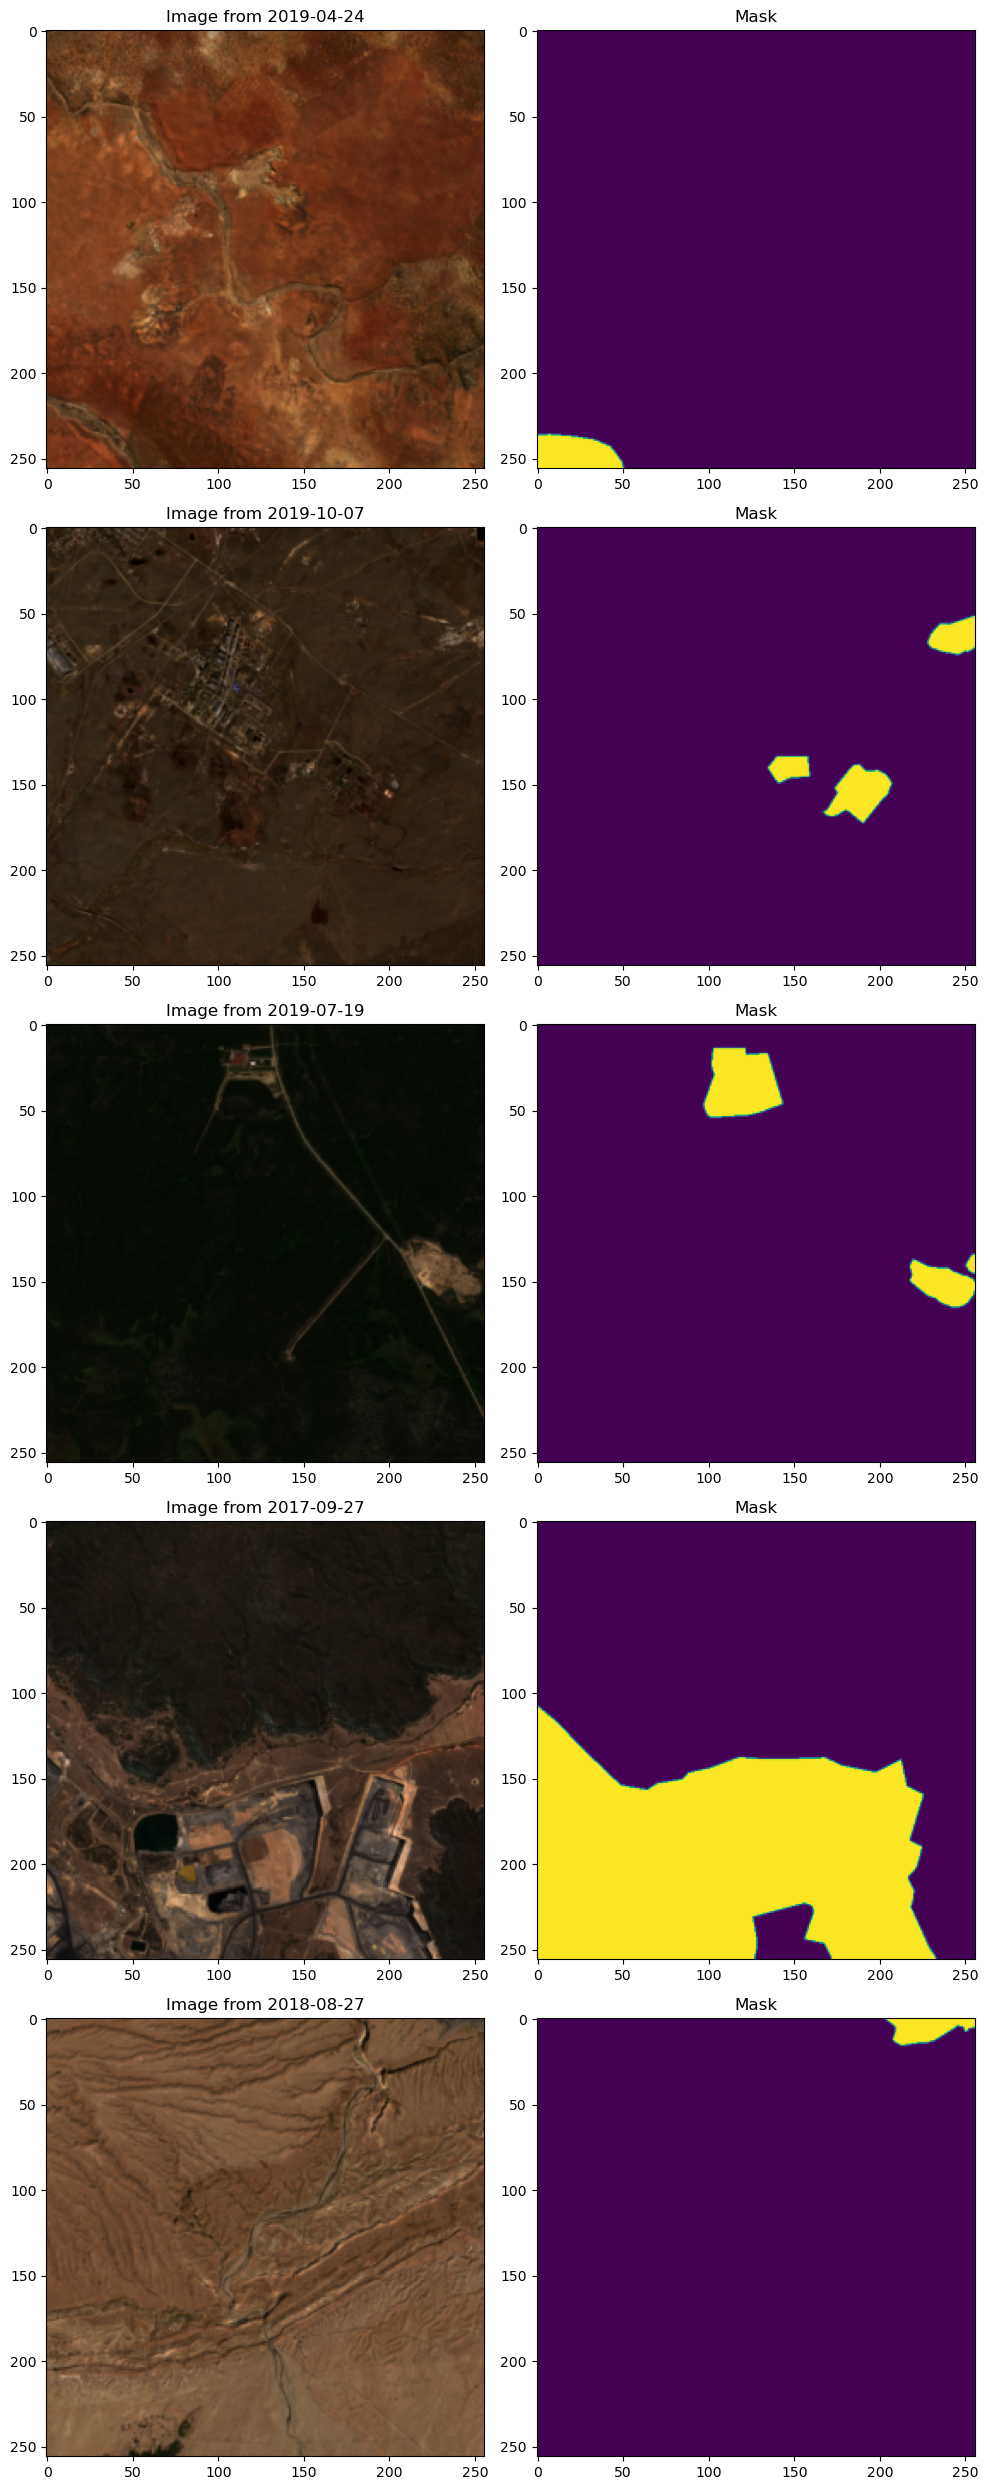

In [13]:
plot_images_and_masks(root, seed=5)